# Student Performance Indicator

#### Life cycle of machine learning project

- Understanding the Problem Statement
- Data collection
- Data checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model training
- Choose best model

### 1) Problem Statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity,Parental level of education, Lunch and test preparation.

### 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- The dataset consist of 8 columns and 1000 rows

### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warning libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the data CSV data as Pandas DataFrame

In [2]:
df = pd.read_csv('C:\\Users\\user\\Documents\\datasets\\stud.csv')

Show top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the DataSet

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information

- gender : sex of students -> (Male/Female)
- race/ethnicity : ethnicity of students(Group A,B,C,D,E)
- Parental level of education : parents final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch - having lunch before test -> (standard or free/reduced)
- test prepration course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data checks to perform

- Check Missing Values
- Check duplicates
- Check data type
- Check the unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical columns

### 3.1 Check missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in dataset

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### There are no duplicated values in the dataset

### 3.3 Check data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check the unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 3.6 Exploring data

In [10]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [11]:
print("Categories in 'gender' variable: ", end = " ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end = " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end = " ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end = " ")
print(df['lunch'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['standard' 'free/reduced']


In [12]:
#define numeric and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype!="O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype=="O"]

print("We have {} of numeric features: {}".format(len(numeric_features), numeric_features))
print("We have {} of categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 of numeric features: ['math_score', 'reading_score', 'writing_score']
We have 5 of categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.7 Adding columns for Total score and Average

In [13]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths:{math_full}')
print(f'Number of students with full marks in Writing:{writing_full}')
print(f'Number of students with full marks in Reading:{reading_full}')

Number of students with full marks in Maths:7
Number of students with full marks in Writing:14
Number of students with full marks in Reading:17


In [15]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less then 20 marks in Maths:{math_less_20}')
print(f'Number of students with less then 20 marks in Writing:{writing_less_20}')
print(f'Number of students with less then 20 marks in Reading:{reading_less_20}')

Number of students with less then 20 marks in Maths:4
Number of students with less then 20 marks in Writing:3
Number of students with less then 20 marks in Reading:1


## 4.Exploring data

### 4.1 Visualize average score distribution to make some conclusions
- Histograms
- Kernel density estimations(KDE)

### 4.1.1 Histogram and KDE

<Axes: xlabel='average', ylabel='Count'>

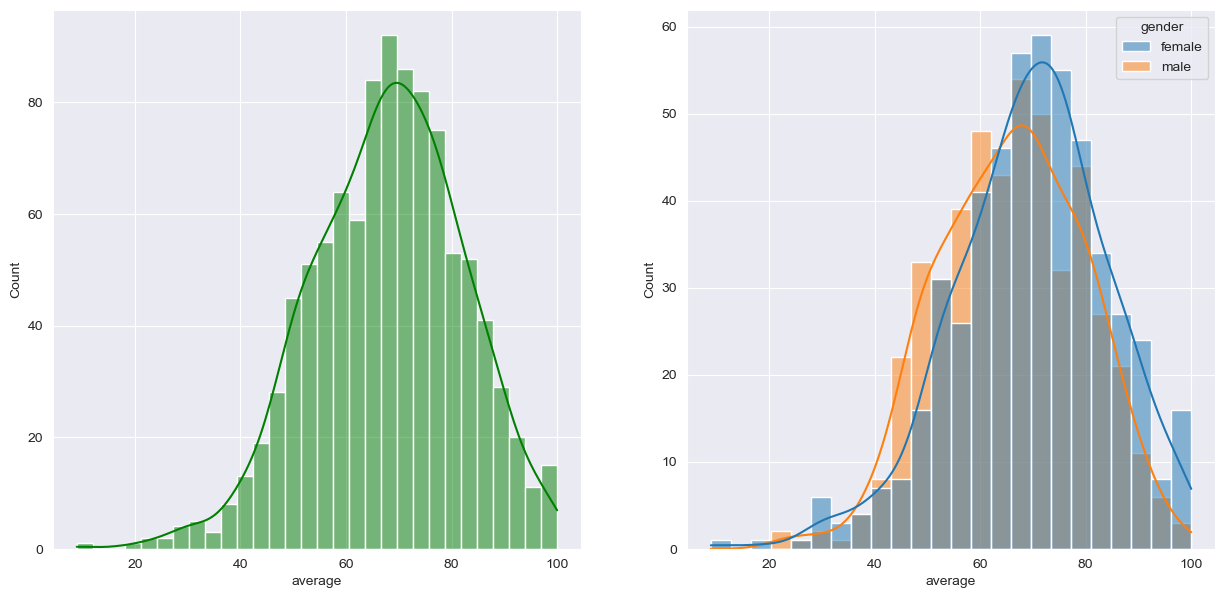

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='average',kde=True,hue='gender')

<Axes: xlabel='total score', ylabel='Count'>

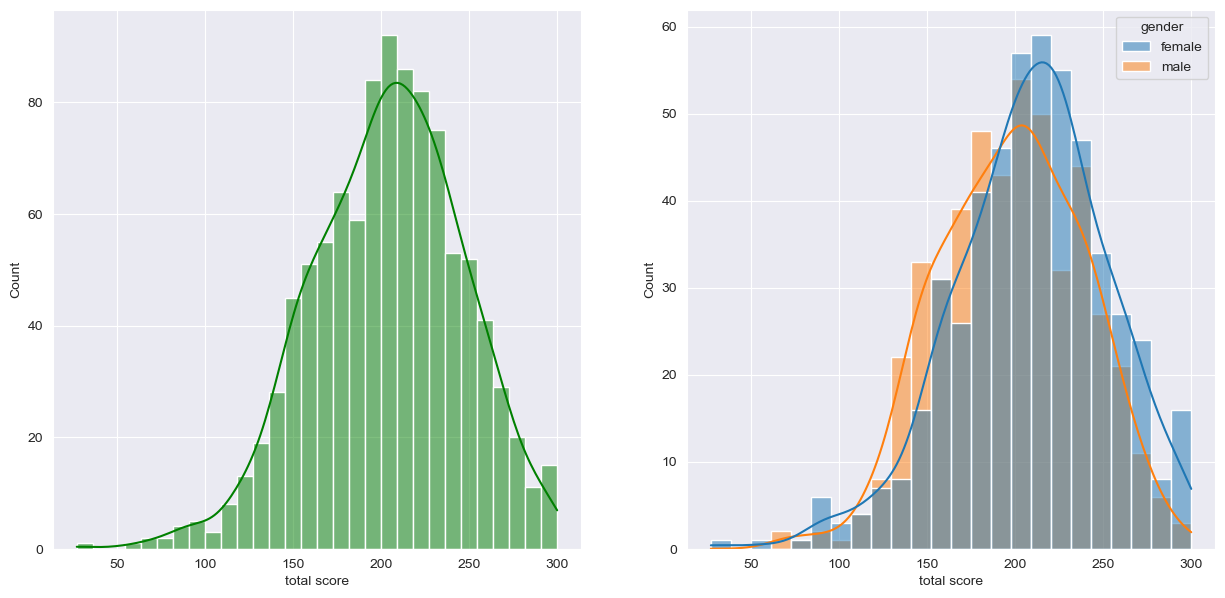

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score',kde=True,hue='gender')

<Axes: xlabel='average', ylabel='Count'>

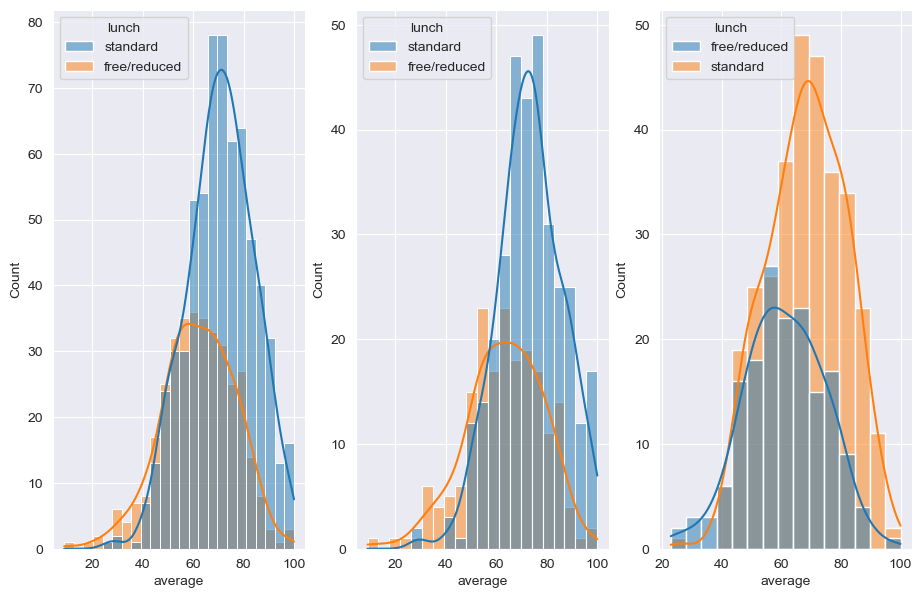

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df, x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'female'], x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'male'], x='average',kde=True,hue='lunch')

In [19]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

<Axes: xlabel='average', ylabel='Count'>

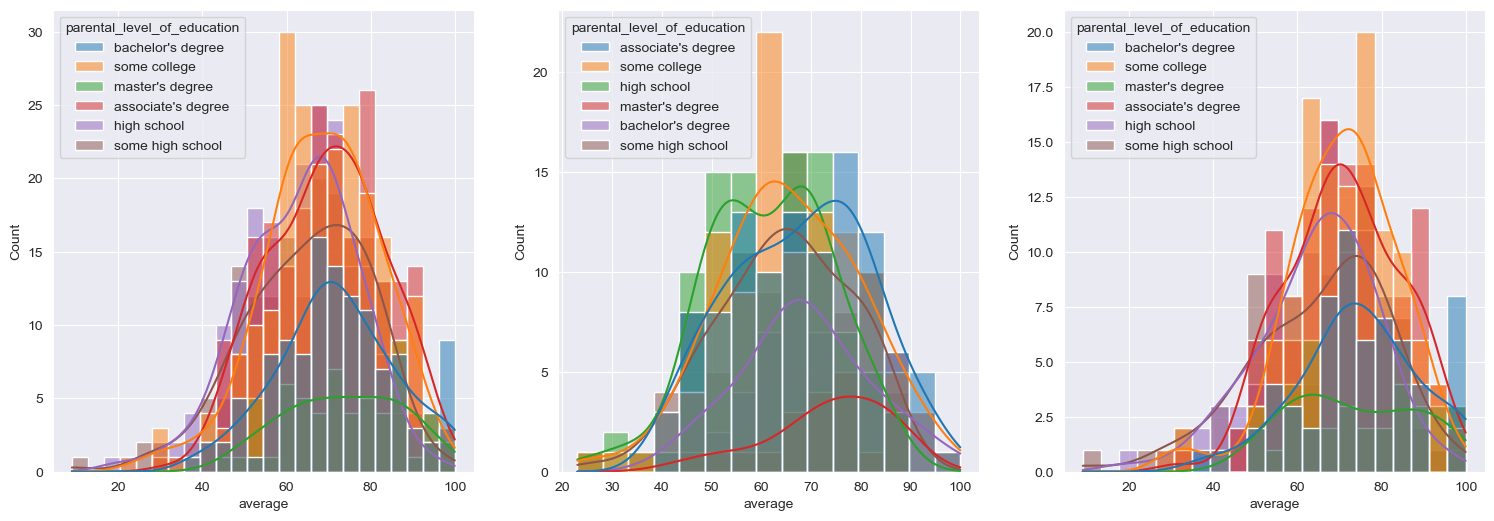

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'male'], x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'female'], x='average',kde=True,hue='parental_level_of_education')

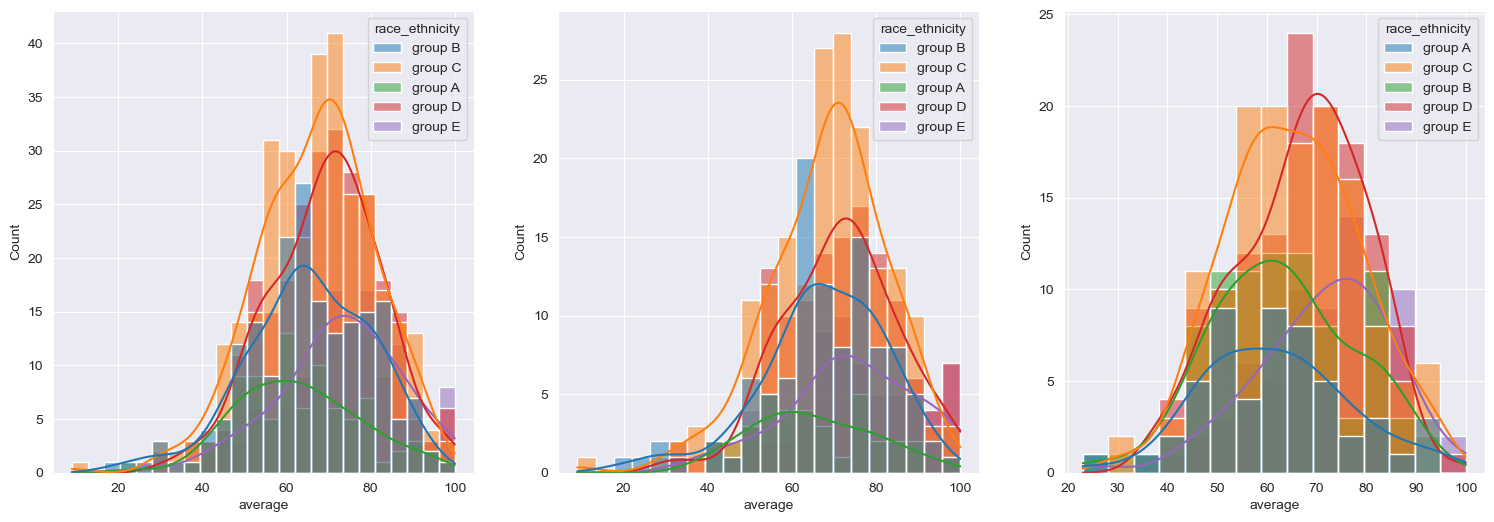

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'female'], x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'male'], x='average',kde=True,hue='race_ethnicity')
plt.show()

In [22]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

<Axes: ylabel='writing_score'>

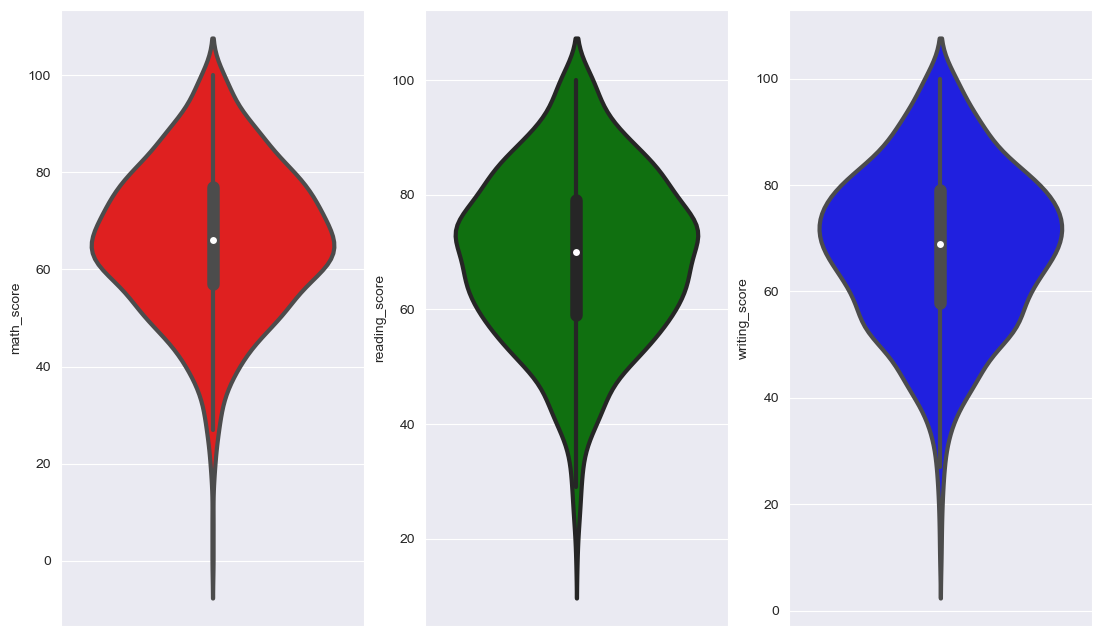

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
sns.violinplot(y='reading_score', data=df, color='green',linewidth=3)
plt.subplot(1, 4, 3)
sns.violinplot(y='writing_score', data=df, color='blue',linewidth=3)

In [48]:
a = df["race_ethnicity"].unique()
print(a, end = "")

['group B' 'group C' 'group A' 'group D' 'group E']

(-1.25, 1.25, -1.25, 1.25)

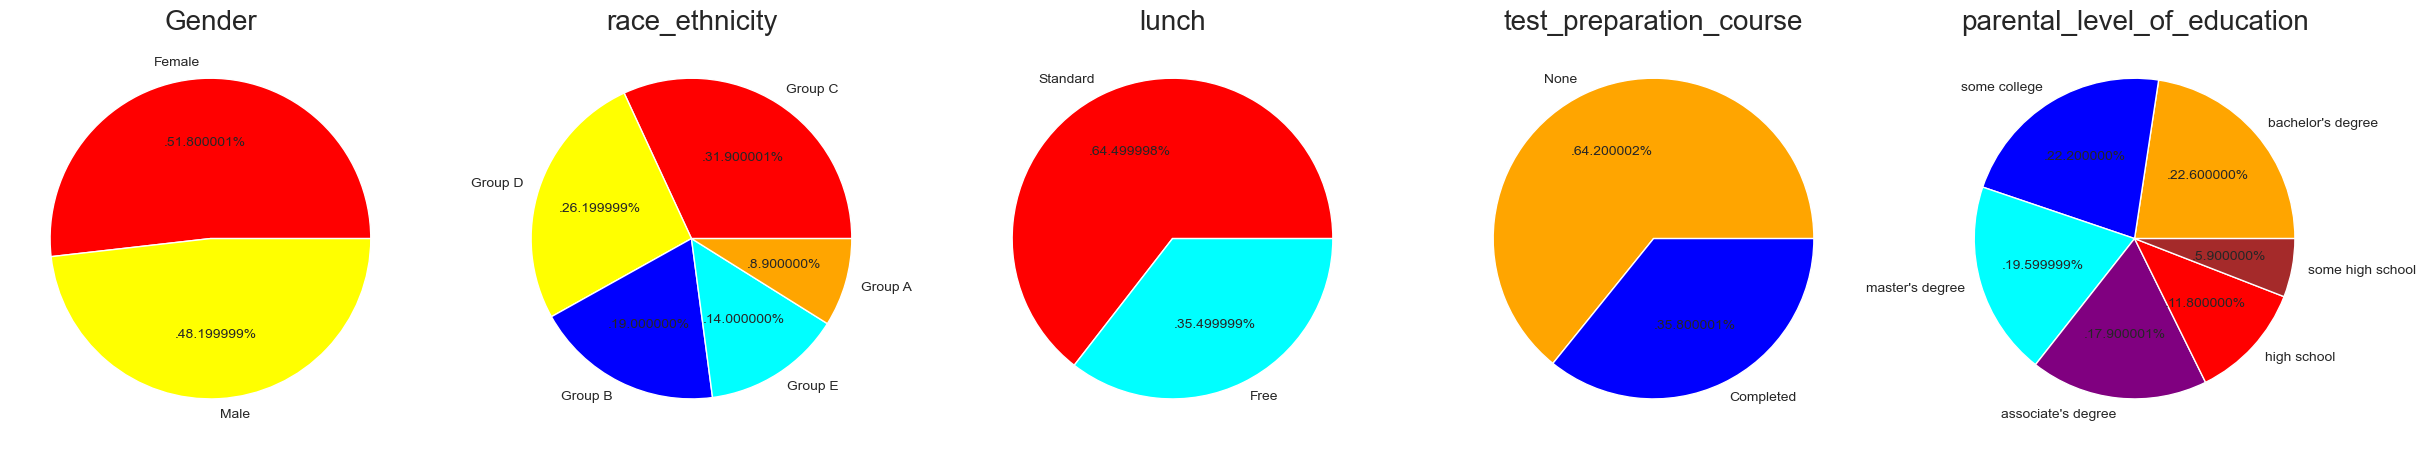

In [34]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'yellow']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'yellow', 'blue', 'cyan', 'orange']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('race_ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'cyan']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['orange', 'blue']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('test_preparation_course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = "bachelor's degree", "some college", "master's degree", "associate's degree", "high school", "some high school"
color = ['orange', 'blue', 'cyan', 'purple', 'red', 'brown']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('parental_level_of_education', fontsize=20)
plt.axis('off')

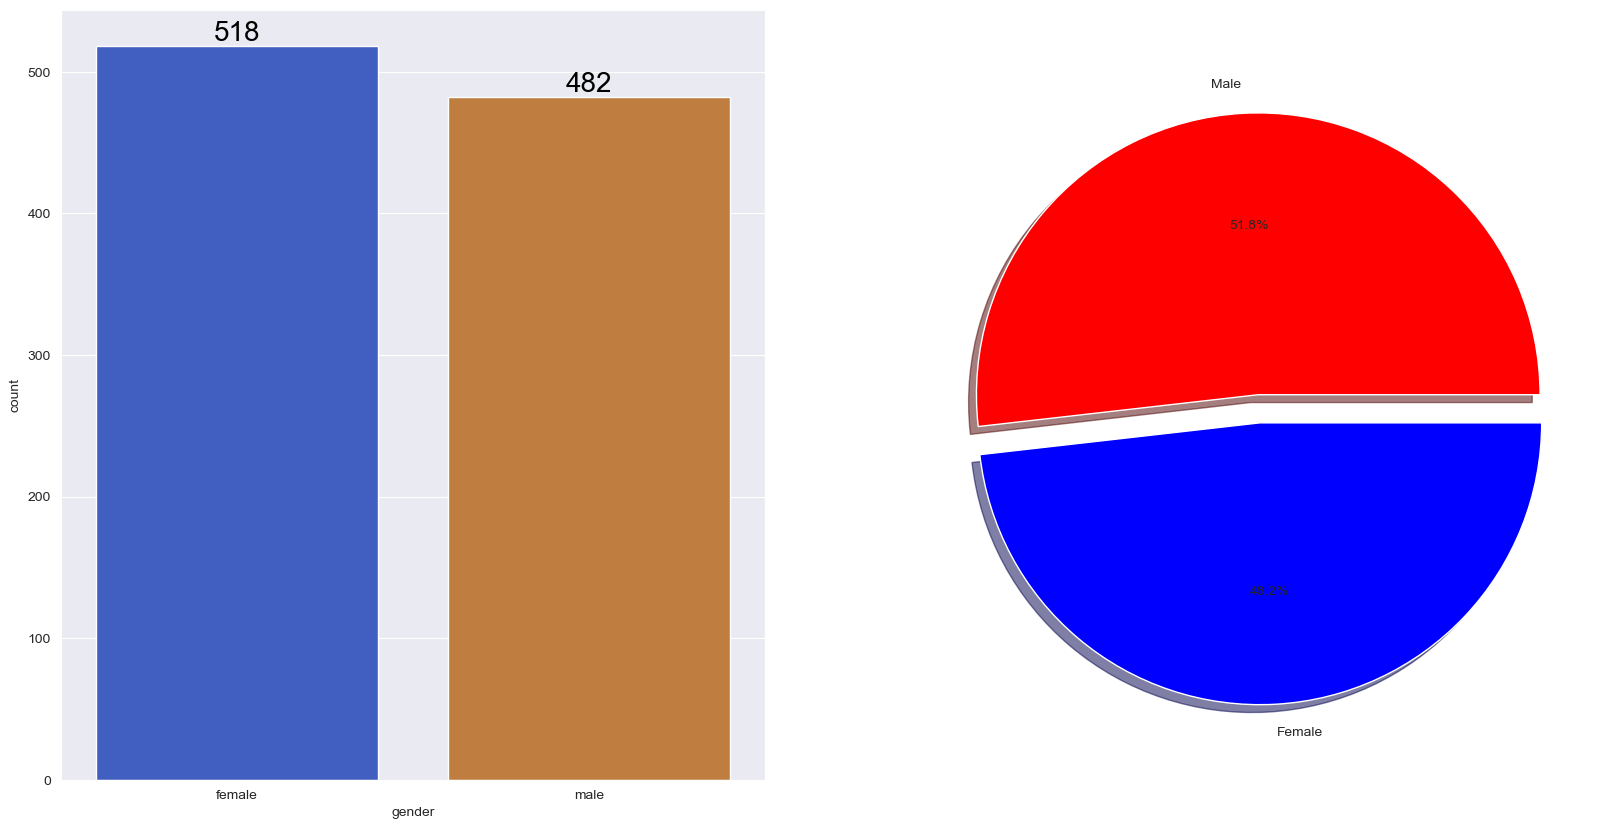

In [38]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.5)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True,colors=['red', 'blue'])
plt.show()

In [45]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


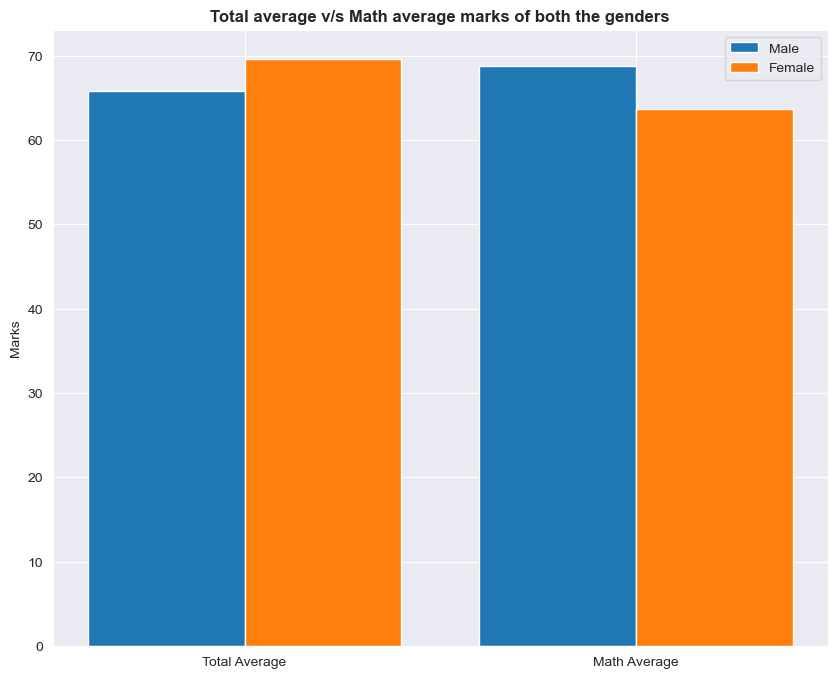

In [46]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

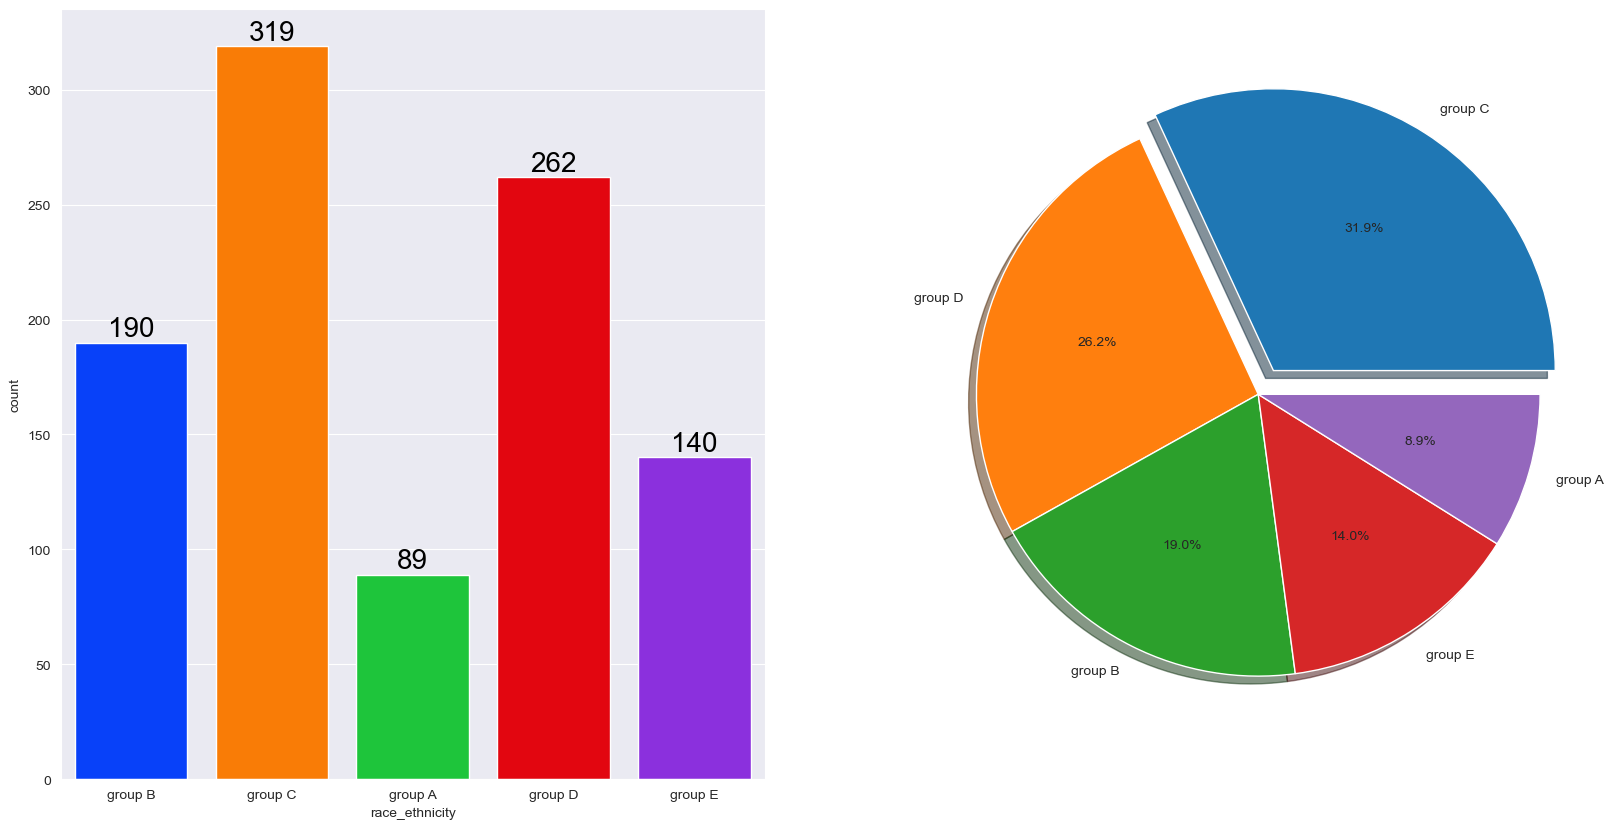

In [50]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index, explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True)
plt.show()

In [55]:
Group_data2=df.groupby('race_ethnicity')
Group_data2

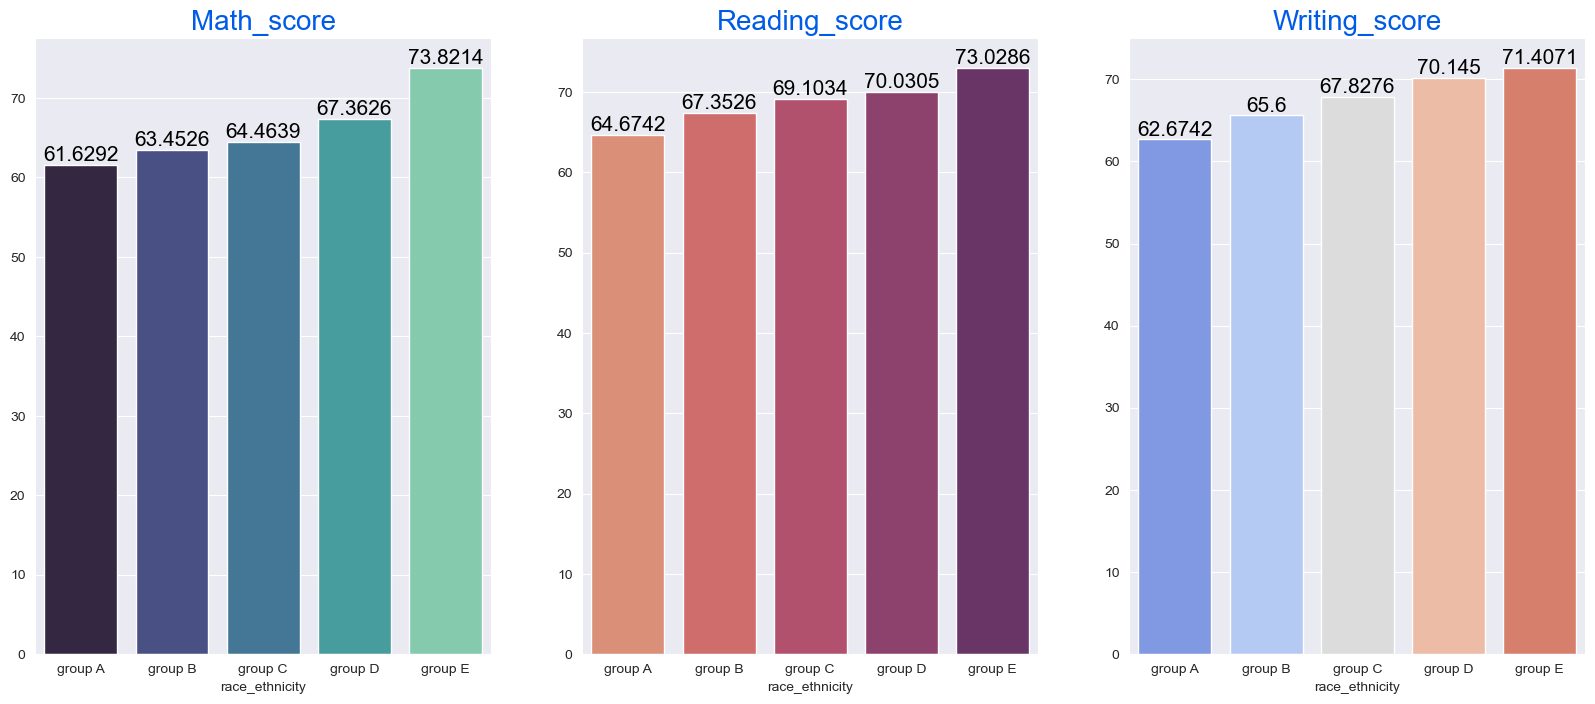

In [58]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

In [61]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

In [63]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

ValueError: could not convert string to float: "bachelor's degree"

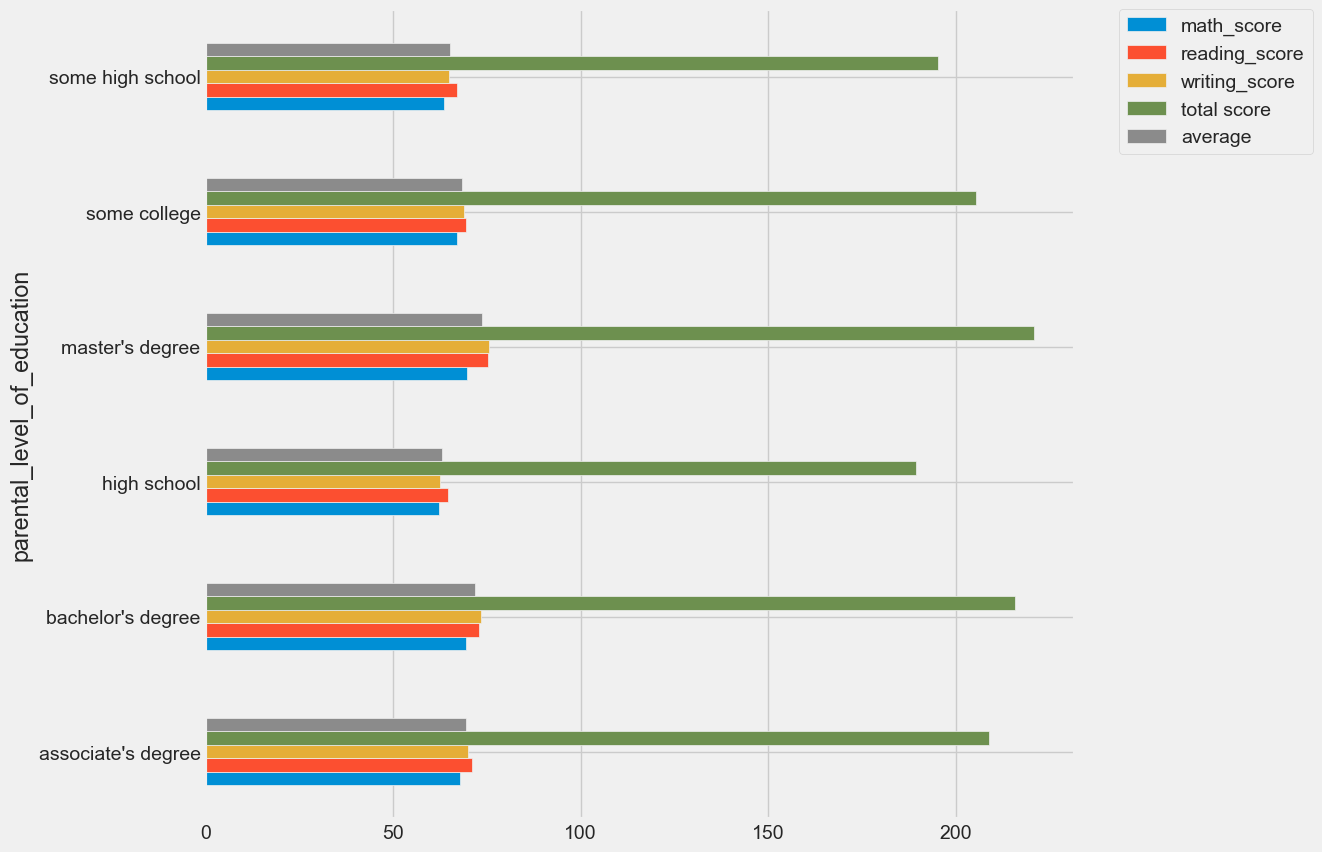

In [64]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

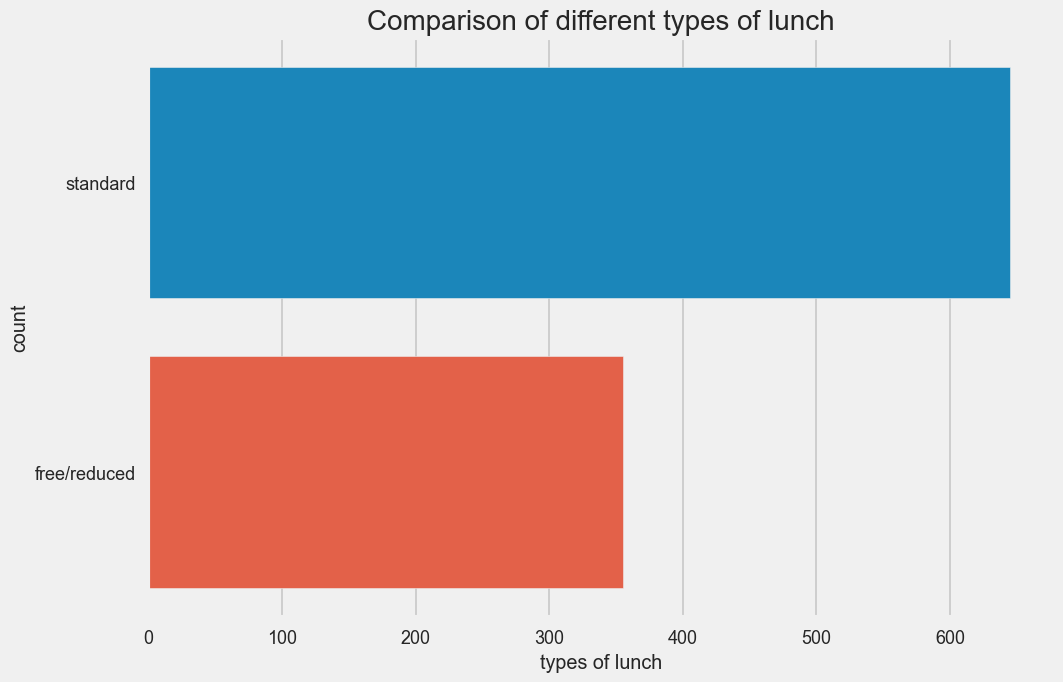

In [69]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.barplot(data=df, x=df['lunch'].value_counts(), y=df['lunch'].value_counts().index)
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

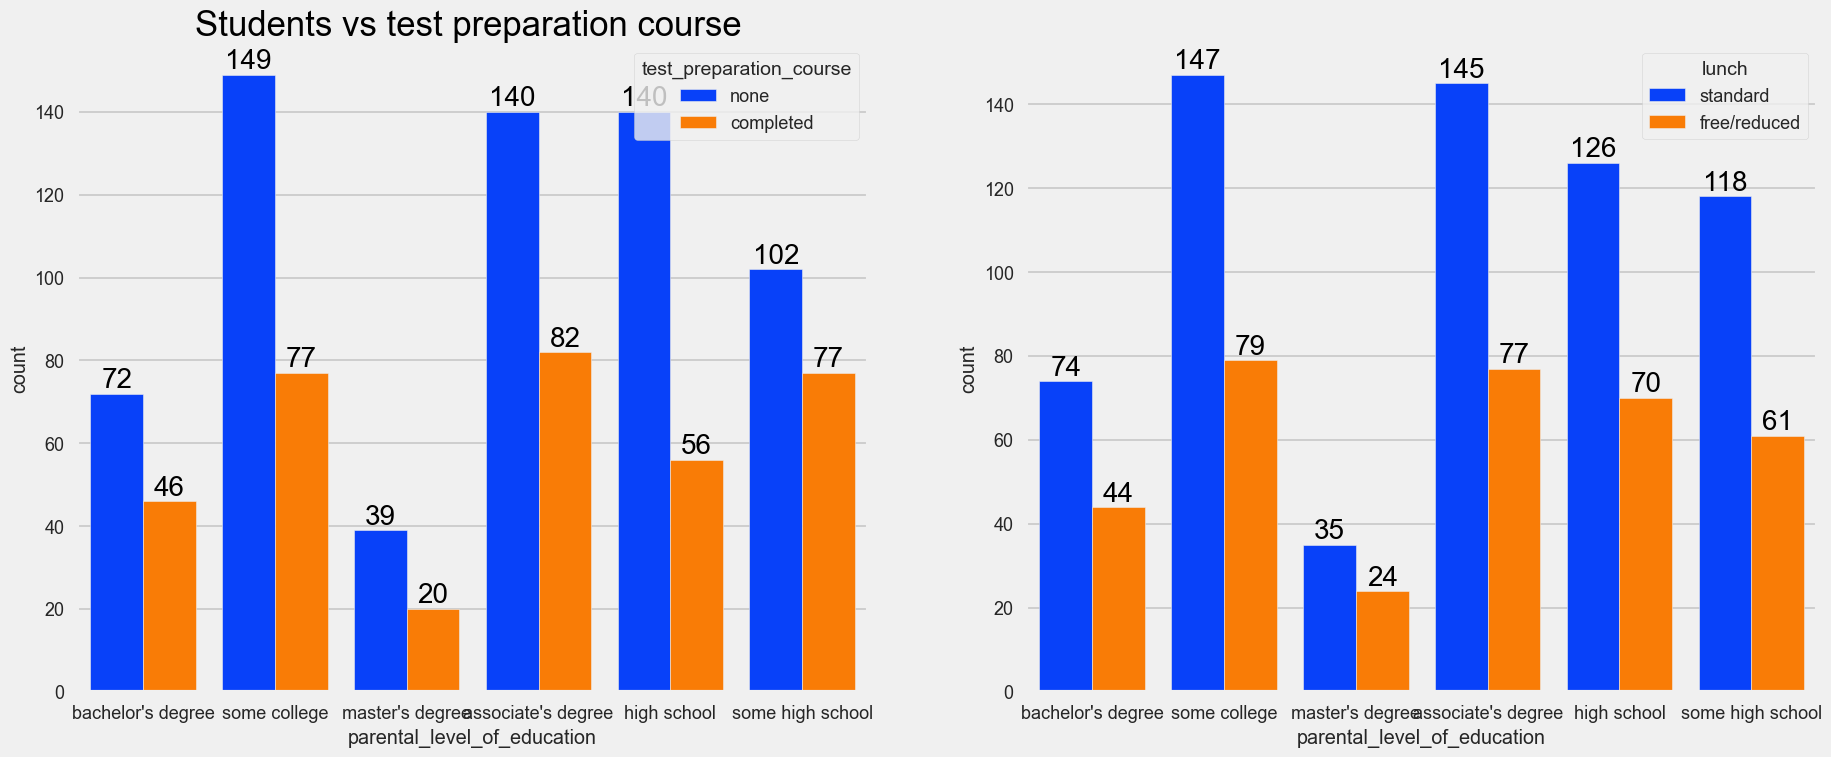

In [71]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

<Axes: xlabel='lunch', ylabel='writing_score'>

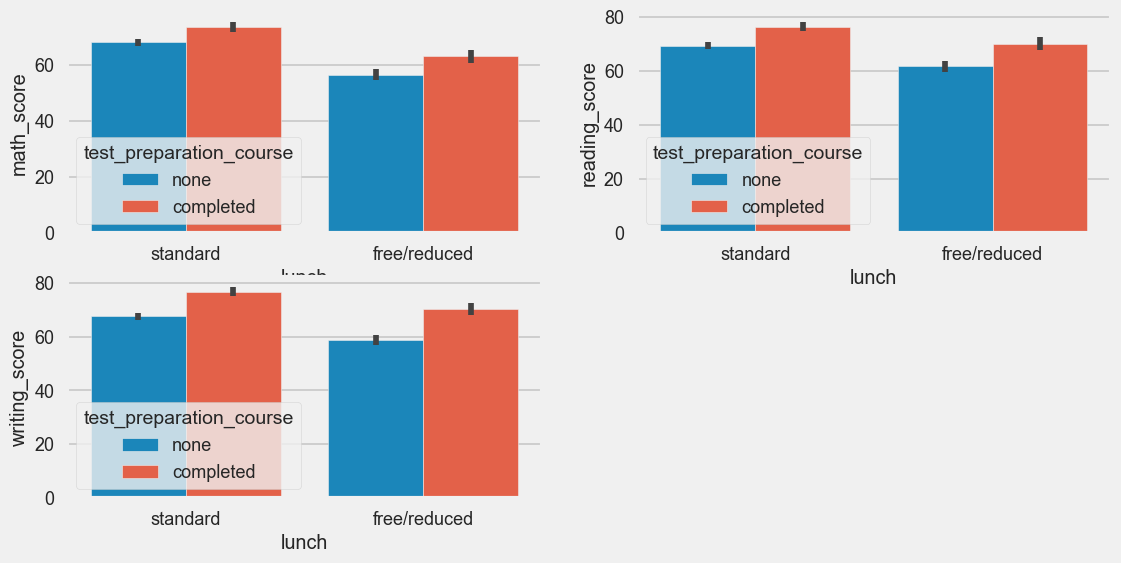

In [72]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

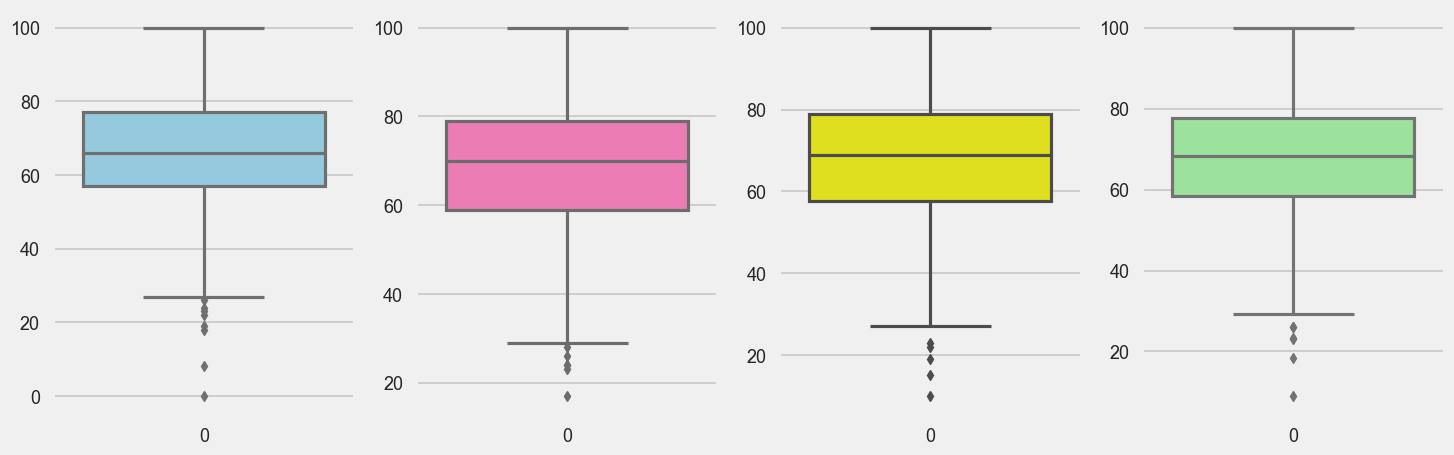

In [73]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

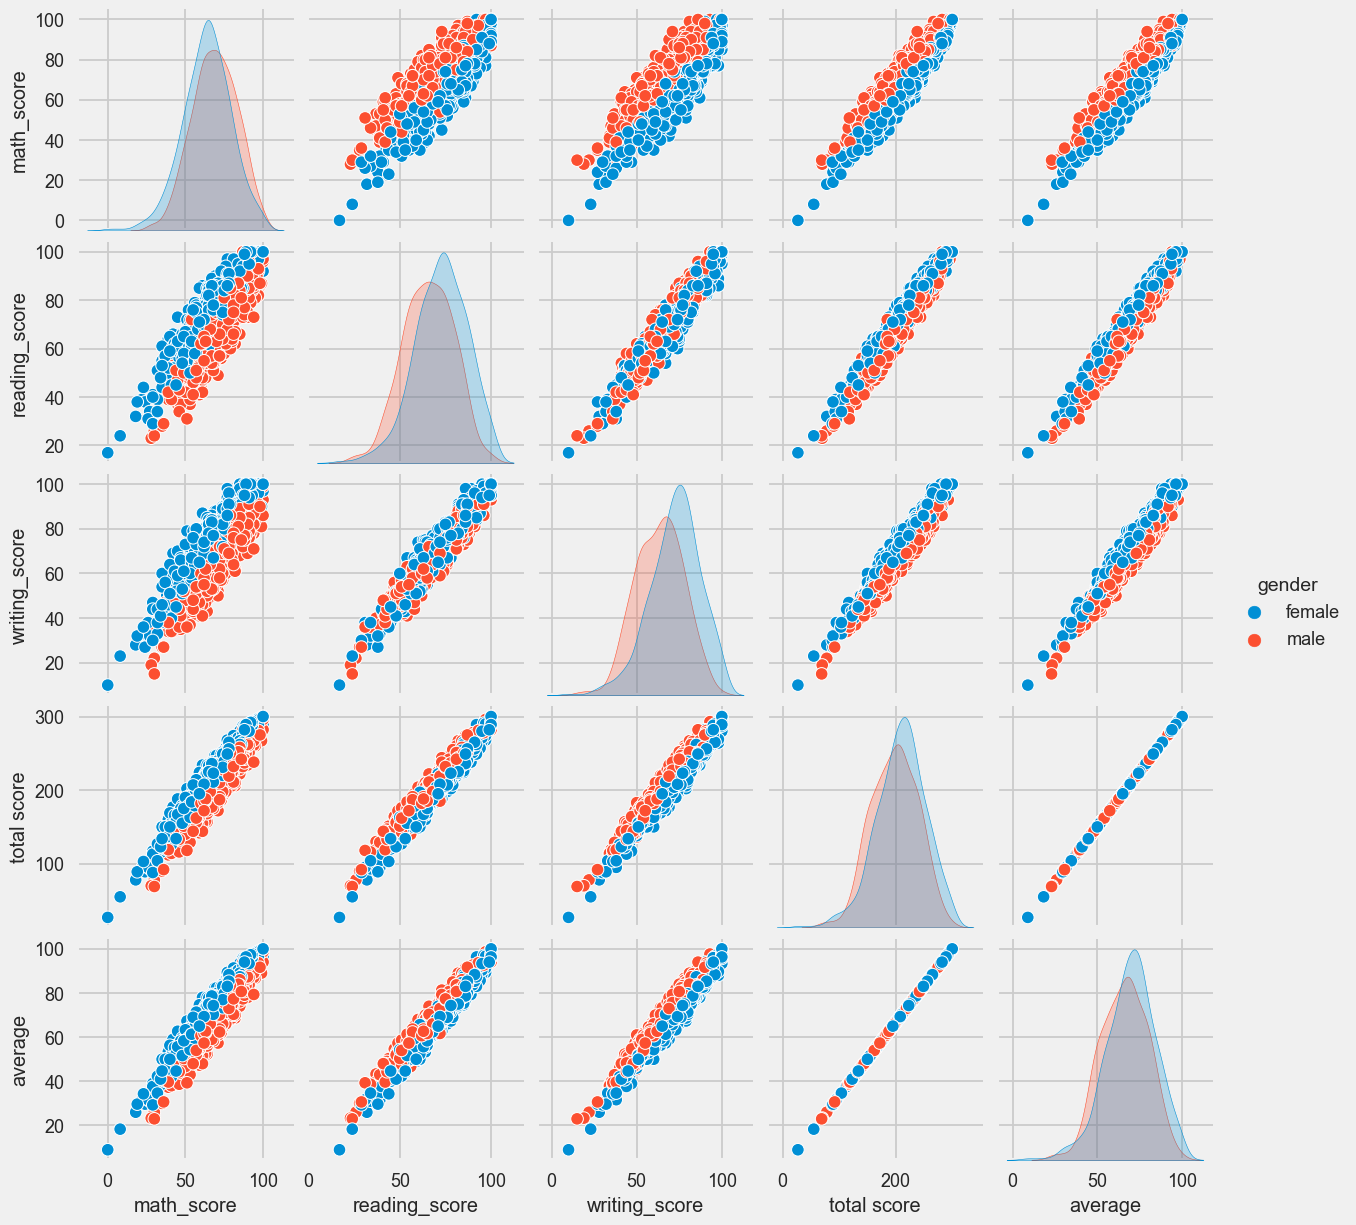

In [74]:
sns.pairplot(df,hue = 'gender')
plt.show()